In [1]:
import pandas as pd
import numpy as np
import helper


In [2]:
df_zhvi = pd.read_csv('csv/Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv')
df_unrate = pd.read_csv('csv/UNRATE.csv')
df_m2sl = pd.read_csv('csv/M2SL.csv')
df_mort = pd.read_csv('csv/MORTGAGE30US.csv')

In [3]:
df_zhvi = df_zhvi.drop(df_zhvi[df_zhvi['RegionType'] == 'country'].index)
print('ZHVI')
df_zhvi

ZHVI


,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29
1,394913,1,"New York, NY",msa,NY,214310.236010,215216.047867,216126.967437,217969.331102,219867.477357,...,622786.752617,627226.773615,630957.555872,634423.988018,637376.926068,640144.093347,642949.767975,646198.465661,649339.465672,653616.736279
2,753899,2,"Los Angeles, CA",msa,CA,235063.293630,235960.377463,237128.193165,239455.595057,241981.445293,...,908708.529826,917438.050307,929877.762382,944793.171793,959702.145809,972094.418383,981381.779434,987298.296973,987379.790384,984120.351855
3,394463,3,"Chicago, IL",msa,IL,153867.253335,154016.641377,154291.741146,154976.052448,155793.832612,...,305235.605386,307848.365490,310451.636320,312880.468318,314604.292004,315886.352351,316799.310885,317542.154819,318357.231575,319938.840086
4,394514,4,"Dallas, TX",msa,TX,127001.406363,127057.576859,127126.889752,127302.658483,127529.019387,...,371263.553697,372097.789704,373079.986909,373992.727762,374383.415798,374472.137582,374323.278545,374002.844062,374031.323844,374518.028946
5,394692,5,"Houston, TX",msa,TX,122713.873933,122734.119091,122645.504899,122699.936078,122749.185099,...,304520.032432,305318.064551,306247.213262,307129.565268,307490.879611,307521.345940,307245.451567,306847.884720,306854.677127,307249.201021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,753929,935,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,116718.754731,116033.851926,115668.464198,115871.672217,115552.350318,114067.764570,112045.295364,110163.919671,108593.176756,107827.761368
891,394743,936,"Ketchikan, AK",msa,AK,NaN,NaN,NaN,NaN,NaN,...,416000.355770,417563.582610,419076.377576,418453.627295,416130.298828,412368.412153,409207.757687,406428.084392,405941.057042,405886.358475
892,753874,937,"Craig, CO",msa,CO,96632.561941,96893.671322,97359.958006,98029.158090,98793.164984,...,267971.078956,271582.128597,274431.699370,276619.936818,277847.001856,279056.635213,279765.095737,279700.147083,278942.274826,278875.715583
893,395188,938,"Vernon, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,91389.885425,91362.427922,90841.514441,89856.108562,88922.833866,87932.049143,86551.339594,85335.095731,84700.083066,84789.536515


In [4]:
df_zhvi_clean = df_zhvi.drop(['SizeRank', 'RegionName', 'RegionType', 'StateName'], axis=1)
df_zhvi_clean.columns

Index(['RegionID', '2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
       '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31', '2000-09-30',
       ...
       '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30',
       '2023-10-31', '2023-11-30', '2023-12-31', '2024-01-31', '2024-02-29'],
      dtype='object', length=291)

In [5]:
melted_df_zhvi = pd.melt(df_zhvi_clean, id_vars=['RegionID'], var_name='Date', value_name='Price')
melted_df_zhvi['date'] = pd.to_datetime(melted_df_zhvi['Date']) + pd.offsets.MonthBegin(1)
melted_df_zhvi.drop('Date', axis=1, inplace=True)
melted_df_zhvi.rename(columns={'Price': 'price'}, inplace=True)
melted_df_zhvi

,RegionID,price,date
0,394913,214310.236010,2000-02-01
1,753899,235063.293630,2000-02-01
2,394463,153867.253335,2000-02-01
3,394514,127001.406363,2000-02-01
4,394692,122713.873933,2000-02-01
...,...,...,...
259255,753929,107827.761368,2024-03-01
259256,394743,405886.358475,2024-03-01
259257,753874,278875.715583,2024-03-01
259258,395188,84789.536515,2024-03-01


In [6]:
display(melted_df_zhvi.dtypes)

RegionID             int64
price              float64
date        datetime64[ns]
dtype: object

In [7]:
zhvi = melted_df_zhvi.groupby('date')['price'].mean().reset_index()
zhvi['price'] = zhvi['price'].round(2)
zhvi

,date,price
0,2000-02-01,108169.71
1,2000-03-01,108347.44
2,2000-04-01,108498.93
3,2000-05-01,109197.02
4,2000-06-01,109951.57
...,...,...
285,2023-11-01,276140.50
286,2023-12-01,276513.69
287,2024-01-01,276646.19
288,2024-02-01,276713.51


In [8]:
df_unrate['DATE'] = pd.to_datetime(df_unrate['DATE'])
df_unrate.rename(columns={'DATE': 'date', 'UNRATE': 'unrate'}, inplace=True)
df_unrate.drop(df_unrate[df_unrate['date'] < '2000-02-01'].index, inplace=True)
print('UNRATE')
df_unrate

UNRATE


,date,unrate
625,2000-02-01,4.1
626,2000-03-01,4.0
627,2000-04-01,3.8
628,2000-05-01,4.0
629,2000-06-01,4.0
...,...,...
910,2023-11-01,3.7
911,2023-12-01,3.7
912,2024-01-01,3.7
913,2024-02-01,3.9


In [9]:
df_m2sl['DATE'] = pd.to_datetime(df_m2sl['DATE'])
df_m2sl.drop(df_m2sl[df_m2sl['DATE'] < '2000-02-01'].index, inplace=True)
df_m2sl.rename(columns={'DATE': 'date', 'M2SL': 'm2sl'}, inplace=True)
print('M2SL')
df_m2sl

M2SL


,date,m2sl
493,2000-02-01,4679.4
494,2000-03-01,4710.2
495,2000-04-01,4766.1
496,2000-05-01,4753.9
497,2000-06-01,4771.8
...,...,...
777,2023-10-01,20698.7
778,2023-11-01,20724.9
779,2023-12-01,20786.1
780,2024-01-01,20790.2


In [10]:
df_mort['DATE'] = pd.to_datetime(df_mort['DATE'])
df_mort.drop(df_mort[df_mort['DATE'] < '2000-02-01'].index, inplace=True)
df_mort.rename(columns={'DATE': 'date', 'MORTGAGE30US': 'mort'}, inplace=True)
df_mort = df_mort.set_index('date').resample('ME').mean().reset_index()
df_mort['date'] = df_mort['date'] + pd.offsets.MonthBegin(1)
df_mort.sort_values(by='date', inplace=True)

print('MORTGAGE')
df_mort

MORTGAGE


,date,mort
0,2000-03-01,8.3250
1,2000-04-01,8.2400
2,2000-05-01,8.1525
3,2000-06-01,8.5150
4,2000-07-01,8.2880
...,...,...
286,2024-01-01,6.8150
287,2024-02-01,6.6425
288,2024-03-01,6.7760
289,2024-04-01,6.8200


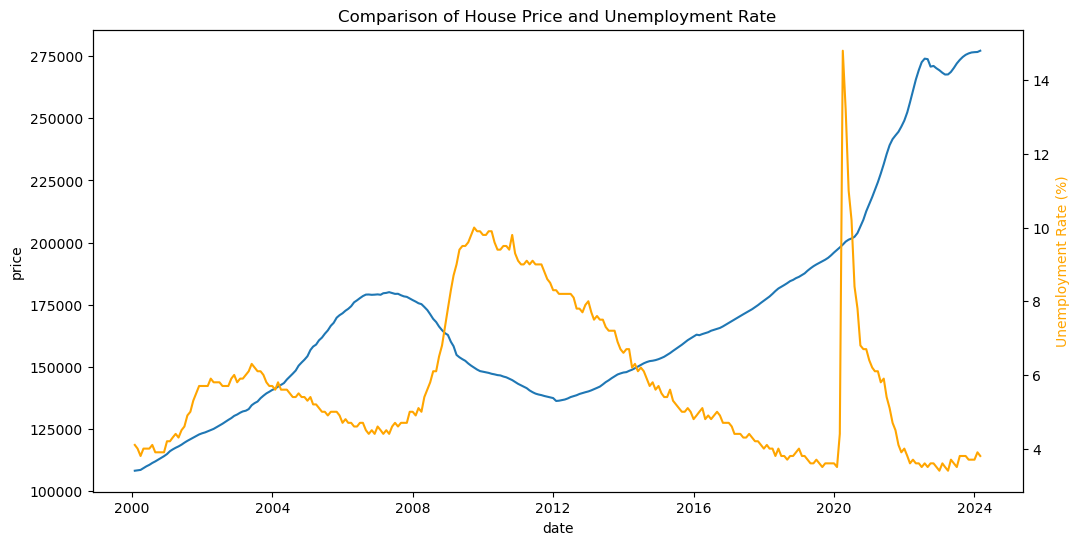

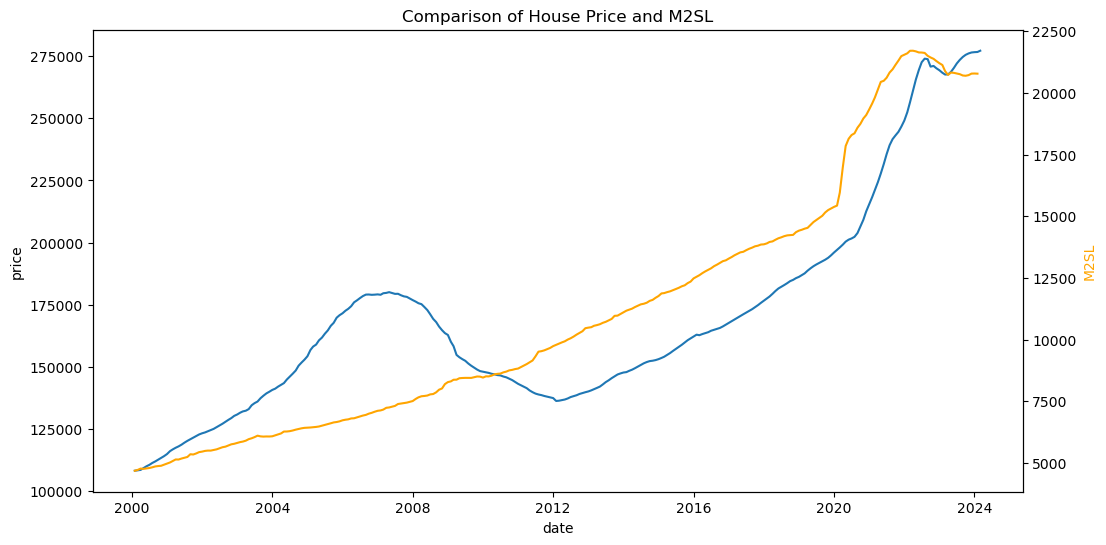

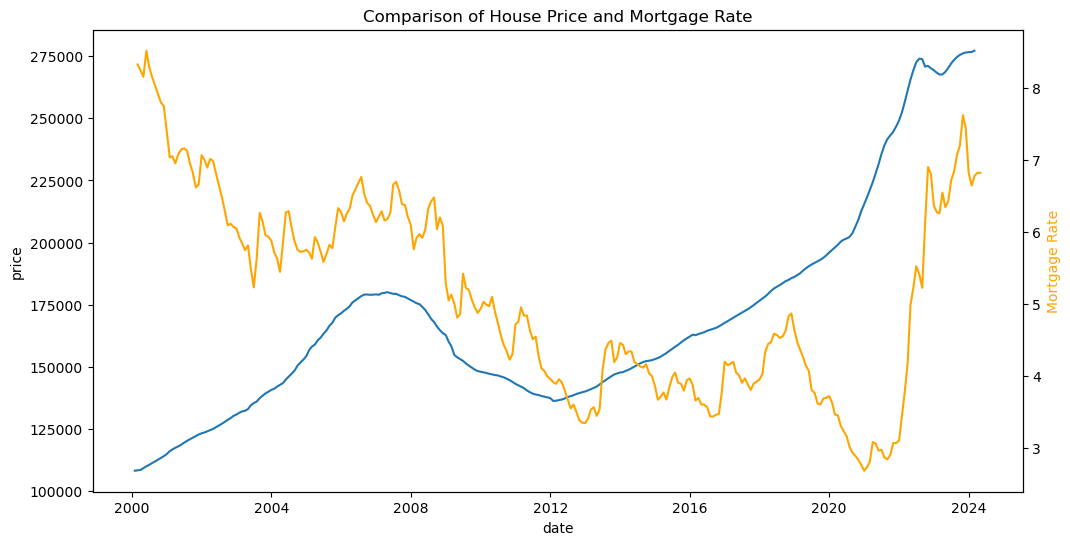

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# PLOTTING UNEMPLOYMENT
plt.figure(figsize=(12, 6))

# Plotting the first line
sns.lineplot(data=zhvi, x='date', y='price')

# Creating a secondary y-axis for df_unrate
ax2 = plt.gca().twinx()
sns.lineplot(data=df_unrate, x='date', y='unrate', ax=ax2, color='orange')

plt.xlabel("Date")
plt.ylabel("Average House Price", color='blue')  # Label for the left y-axis
ax2.set_ylabel("Unemployment Rate (%)", color='orange')  # Label for the right y-axis
plt.title("Comparison of House Price and Unemployment Rate")

plt.show()


# PLOTTING M2SL
plt.figure(figsize=(12, 6))

# Plotting the first line
sns.lineplot(data=zhvi, x='date', y='price')

# Creating a secondary y-axis for df_m2sl
ax2 = plt.gca().twinx()
sns.lineplot(data=df_m2sl, x='date', y='m2sl', ax=ax2, color='orange')

# Set labels and title
plt.xlabel("Datetime")
plt.ylabel("Average House Price", color='blue')  # Label for the left y-axis
ax2.set_ylabel("M2SL", color='orange')  # Label for the right y-axis
plt.title("Comparison of House Price and M2SL")

plt.show()


# PLOTTING MORTGAGE
plt.figure(figsize=(12, 6))

# Plotting the first line
sns.lineplot(data=zhvi, x='date', y='price')

# Creating a secondary y-axis for df_mort
ax2 = plt.gca().twinx()
sns.lineplot(data=df_mort, x='date', y='mort', ax=ax2, color='orange')

plt.xlabel("Datetime")
plt.ylabel("Average House Price", color='blue')  # Label for the left y-axis
ax2.set_ylabel("Mortgage Rate", color='orange')  # Label for the right y-axis
plt.title("Comparison of House Price and Mortgage Rate")

plt.show()


In [12]:
df_merged = (
    zhvi
        .merge(df_m2sl, on='date')
        .merge(df_unrate, on="date")
        .merge(df_mort, on="date")
        # .drop('date', axis=1)
)
df_merged['date_n'] = pd.to_numeric(df_merged['date'])
df_merged

,date,price,m2sl,unrate,mort,date_n
0,2000-03-01,108347.44,4710.2,4.0,8.3250,951868800000000000
1,2000-04-01,108498.93,4766.1,3.8,8.2400,954547200000000000
2,2000-05-01,109197.02,4753.9,4.0,8.1525,957139200000000000
3,2000-06-01,109951.57,4771.8,4.0,8.5150,959817600000000000
4,2000-07-01,110525.44,4789.4,4.0,8.2880,962409600000000000
...,...,...,...,...,...,...
283,2023-10-01,275567.67,20698.7,3.8,7.2000,1696118400000000000
284,2023-11-01,276140.50,20724.9,3.7,7.6200,1698796800000000000
285,2023-12-01,276513.69,20786.1,3.7,7.4420,1701388800000000000
286,2024-01-01,276646.19,20790.2,3.7,6.8150,1704067200000000000


R-squared: 0.8472109359123123
Mean Absolute Error (MAE): 11589.785997027422
Mean Squared Error (MSE): 186479370.53019103


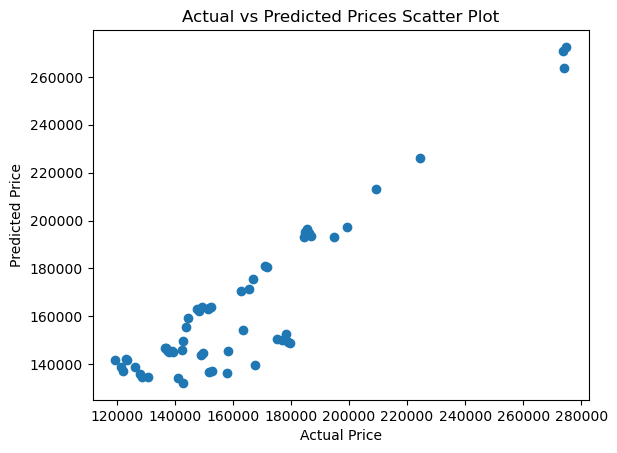

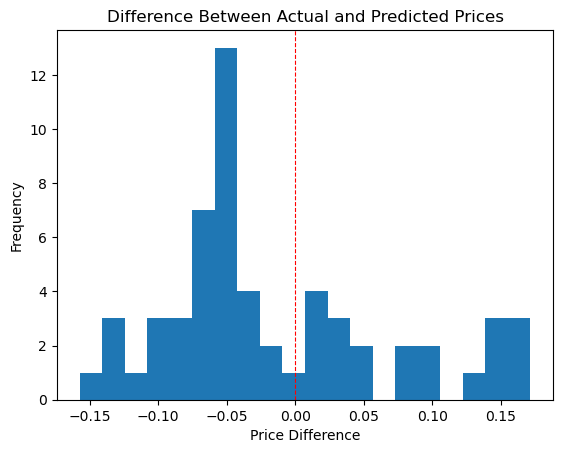

Feature: mort, Coefficient: 10020.264619254463
Feature: unrate, Coefficient: -669.1434821938419
Feature: m2sl, Coefficient: 8.451929396379626
Average cross-validation R2: 0.8505373933302485


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score

# Initialize the model
model = LinearRegression()

# Split dataset into features (X) and target variable (y)
X = df_merged[['m2sl', 'unrate', 'mort']]
y = df_merged['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Regression evaluation metrics
helper.performance_metrics(y_test, y_test_pred)

# Feature importance
feature_coefficients = model.coef_
sorted_indices = np.argsort(np.abs(feature_coefficients))[::-1]
for i in sorted_indices:
    print(f"Feature: {X_train.columns[i]}, Coefficient: {feature_coefficients[i]}")

### With Cross-Validation
# Prepare cross-validation
kf = KFold(n_splits=5, shuffle=True)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
print("Average cross-validation R2:", cv_scores.mean())


R-squared: 0.997450662748887
Mean Absolute Error (MAE): 982.7029344828281
Mean Squared Error (MSE): 3111471.417770276


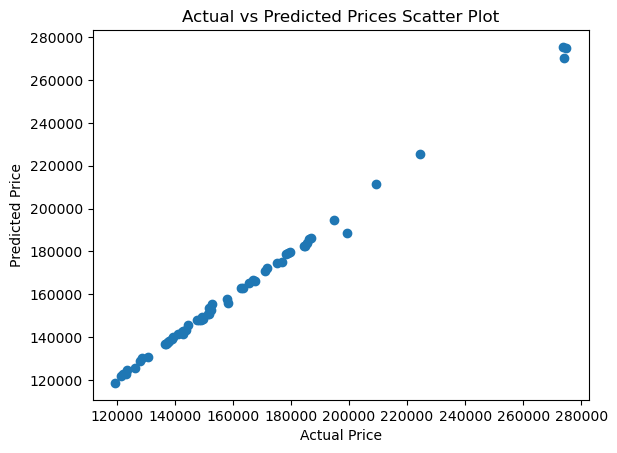

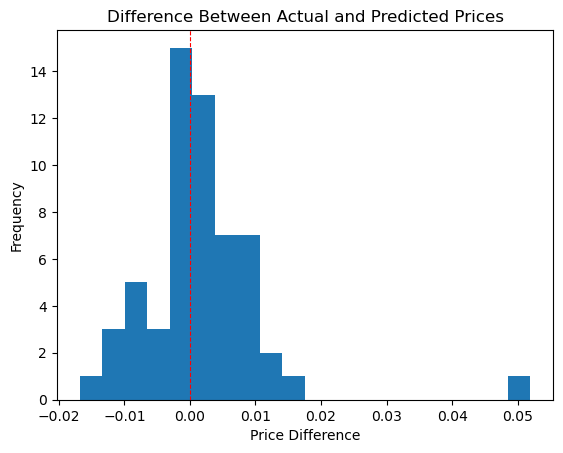

Average cross-validation R2: 0.9966996505742569
[0.89583002 0.07394145 0.03022853]
Feature: m2sl, Importance: 0.8958300236947534
Feature: unrate, Importance: 0.07394144622678922
Feature: mort, Importance: 0.030228530078457327


In [15]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

X_tr = X_train
X_te = X_test
y_tr = y_train
# X_tr = X_train.drop(columns=['unrate', 'mort'])
# X_te = X_test.drop(columns=['unrate', 'mort'])
# y_tr = y_train.drop(columns=['unrate', 'mort'])

model.fit(X_tr, y_tr)

y_train_pred = model.predict(X_tr)
y_test_pred = model.predict(X_te)

helper.performance_metrics(y_test, y_test_pred)

### Let's try Random Forest
kf = KFold(n_splits=5, shuffle=True)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
print("Average cross-validation R2:", cv_scores.mean())


print(model.feature_importances_)
sorted_indices = np.argsort(model.feature_importances_)[::-1]
for i in sorted_indices:
    print(f"Feature: {X_tr.columns[i]}, Importance: {model.feature_importances_[i]}")
